In [20]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [21]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve
)

In [22]:
df = pd.read_csv("Loan_default.csv")

print("Dataset Loaded Successfully")
print(df.head())
print("\nDataset Shape:", df.shape)


Dataset Loaded Successfully
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       O

In [23]:
print("\nMissing Values in Dataset:")
print(df.isnull().sum())



Missing Values in Dataset:
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [40]:
df = df.fillna(df.mean(numeric_only=True))

In [25]:
# Convert the categorical data to numeric

encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = encoder.fit_transform(df[column])

print("\nData after Encoding:")
print(df.head())



Data after Encoding:
   LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  128027   56   85994       50587          520              80   
1  125442   69   50432      124440          458              15   
2   85333   46   84208      129188          451              26   
3  220129   32   31713       44799          743               0   
4  105746   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0               4         15.23        36      0.44          0   
1               1          4.81        60      0.68          2   
2               3         21.17        24      0.31          2   
3               3          7.07        24      0.23          1   
4               4          6.51        48      0.73          0   

   EmploymentType  MaritalStatus  HasMortgage  HasDependents  LoanPurpose  \
0               0              0            1              1            4   
1               0       

In [26]:
# Assume last column is Default Status (Target)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print("\nFeatures Shape:", X.shape)
print("Target Shape:", y.shape)



Features Shape: (255347, 17)
Target Shape: (255347,)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])



Training Samples: 204277
Testing Samples: 51070


In [29]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nFeature Scaling Applied")



Feature Scaling Applied


Model: Logistic Regression
Accuracy : 0.8859017035441551
Precision: 0.6237288135593221
Recall   : 0.031186440677966103
F1 Score : 0.05940274414850686
AUC-ROC  : 0.7497861074734617

Confusion Matrix:
[[45059   111]
 [ 5716   184]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.62      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.76      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070



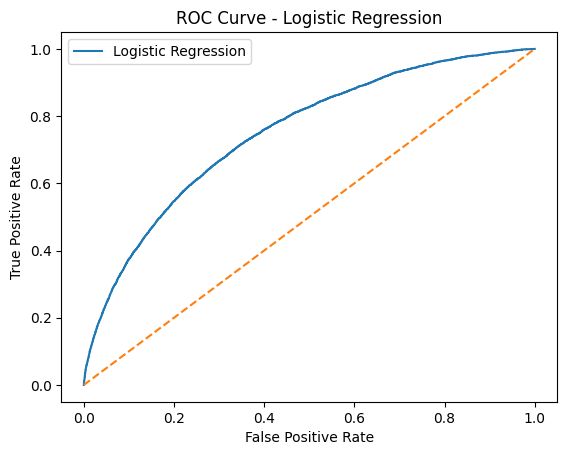

Model: Random Forest
Accuracy : 0.8866849422361465
Precision: 0.6388206388206388
Recall   : 0.04406779661016949
F1 Score : 0.08244807356905026
AUC-ROC  : 0.733067640889596

Confusion Matrix:
[[45023   147]
 [ 5640   260]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.64      0.04      0.08      5900

    accuracy                           0.89     51070
   macro avg       0.76      0.52      0.51     51070
weighted avg       0.86      0.89      0.84     51070



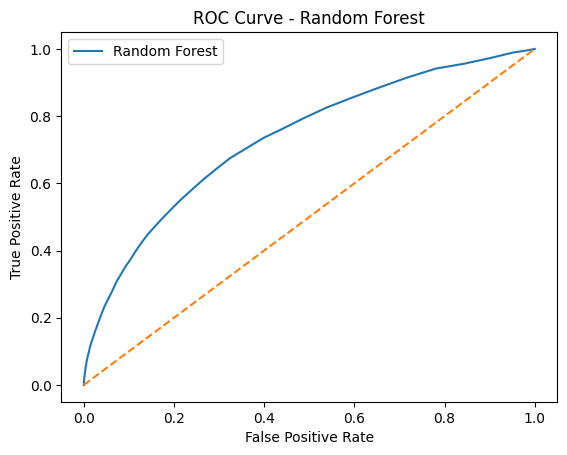

Model: Gradient Boosting
Accuracy : 0.8873506951243392
Precision: 0.6540880503144654
Recall   : 0.05288135593220339
F1 Score : 0.09785165438293869
AUC-ROC  : 0.756604623587727

Confusion Matrix:
[[45005   165]
 [ 5588   312]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.65      0.05      0.10      5900

    accuracy                           0.89     51070
   macro avg       0.77      0.52      0.52     51070
weighted avg       0.86      0.89      0.84     51070



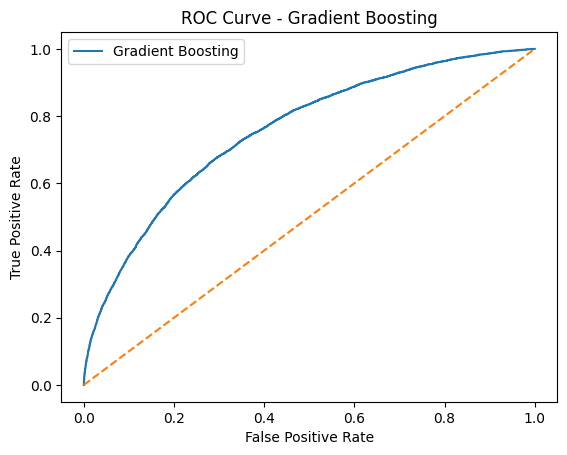

In [41]:
# Define function (already done)

def evaluate(model, name):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

   # print("\n====================================")
    print("Model:", name)
   # print("====================================")

    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("AUC-ROC  :", roc_auc_score(y_test, y_prob))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    fpr, tpr, _ = roc_curve(y_test, y_prob)

    plt.figure()
    plt.plot(fpr, tpr, label=name)
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - " + name)
    plt.legend()
    plt.show()

lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

evaluate(lr, "Logistic Regression")
evaluate(rf, "Random Forest")
evaluate(gb, "Gradient Boosting")



Model: Logistic Regression
Accuracy : 0.8859017035441551
Precision: 0.6237288135593221
Recall   : 0.031186440677966103
F1 Score : 0.05940274414850686
AUC-ROC  : 0.7497861074734617

Confusion Matrix:
[[45059   111]
 [ 5716   184]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.62      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.76      0.51      0.50     51070
weighted avg       0.86      0.89      0.84     51070



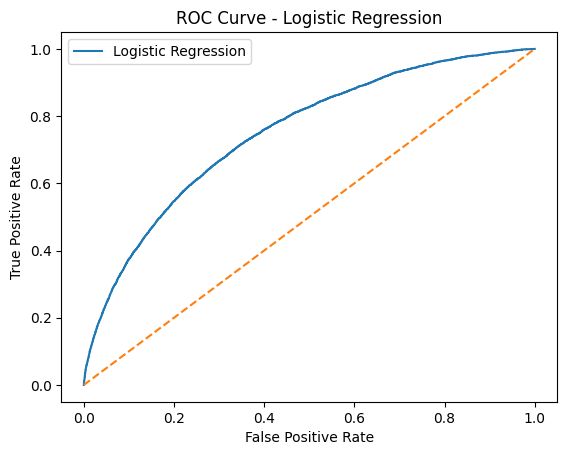

In [37]:
lr = LogisticRegression()
evaluate(lr, "Logistic Regression")


Model: Random Forest Classifier
Accuracy : 0.8871353044840415
Precision: 0.6770833333333334
Recall   : 0.04406779661016949
F1 Score : 0.08274984086569065
AUC-ROC  : 0.7370329958762191

Confusion Matrix:
[[45046   124]
 [ 5640   260]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.68      0.04      0.08      5900

    accuracy                           0.89     51070
   macro avg       0.78      0.52      0.51     51070
weighted avg       0.86      0.89      0.84     51070



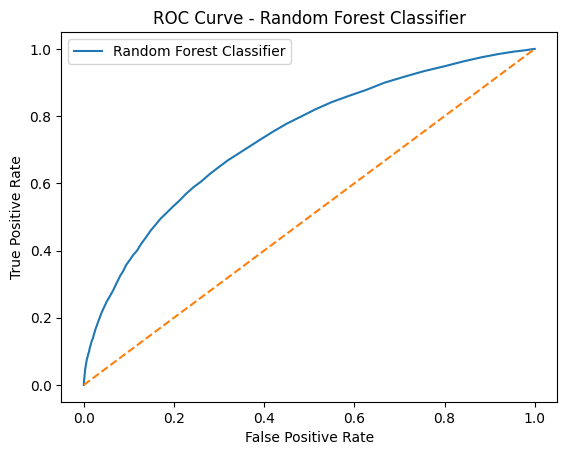

In [38]:
rf = RandomForestClassifier(n_estimators=150, random_state=42)
evaluate(rf, "Random Forest Classifier")



Model: Gradient Boosting Classifier
Accuracy : 0.8873506951243392
Precision: 0.6540880503144654
Recall   : 0.05288135593220339
F1 Score : 0.09785165438293869
AUC-ROC  : 0.756604623587727

Confusion Matrix:
[[45005   165]
 [ 5588   312]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.65      0.05      0.10      5900

    accuracy                           0.89     51070
   macro avg       0.77      0.52      0.52     51070
weighted avg       0.86      0.89      0.84     51070



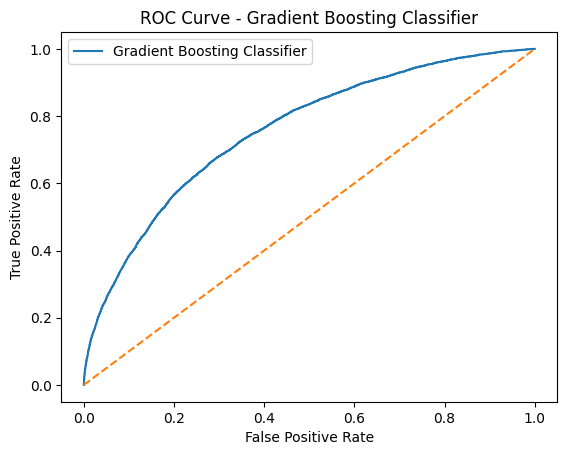

In [39]:
gb = GradientBoostingClassifier()
evaluate(gb, "Gradient Boosting Classifier")
